# Consistence Test, Messier Objects

We calculated the age of several messier objects

In [1]:
import numpy as np
from astropy.table import Table, join

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
filepath = '../resources/ages_messier.tsv'
data = Table.read(filepath, format='ascii.commented_header', delimiter='\t')
data['SN ID'] = data['SN ID'].astype(int)    # Convert SN ID from float

In [11]:
data

SN ID,Age,Upper CR,Lower CR
int64,float64,float64,float64
63,2.76506019359,2.04333652751,1.98912879026
82,12.2975893277,0.579735419315,10.2231959721
87,11.8460912997,0.337198746194,0.196499602061
89,10.6238741833,0.140662086031,0.191632253163
91,11.6680278395,0.154765142743,0.0931349430291
101,5.06991628791,2.13139236875,1.95161341036
105,11.5995304921,0.712949881028,9.82412264518
108,11.24345747,0.335920363797,1.07842832819


In [61]:
spiral = [63, 91, 101]
elliptical = [87, 89, 105]
starburst = [82, 108]

spi_ID = [0, 4, 5]
ell_ID = [2, 3, 6]
sta_ID = [1, 7]

In [63]:
data[spi_ID]
data['Age'][spi_ID]

2.76506019359
11.6680278395
5.06991628791


In [5]:
sns.set_style("whitegrid")

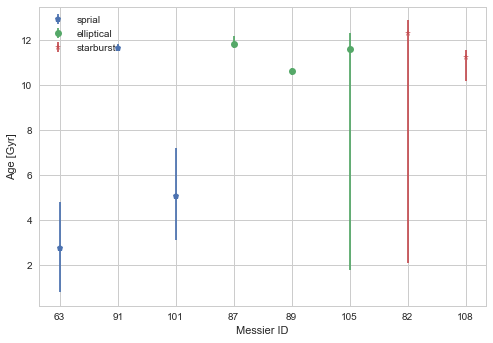

In [77]:
plt.figure('messier')
plt.errorbar([0,1,2], data['Age'][spi_ID],
             yerr=[data['Lower CR'][spi_ID], 
                   data['Upper CR'][spi_ID]],
             fmt='p', label='sprial')
plt.errorbar([3,4,5], data['Age'][ell_ID],
             yerr=[data['Lower CR'][ell_ID], 
                   data['Upper CR'][ell_ID]],
             fmt='o', label='elliptical')
plt.errorbar([6,7], data['Age'][sta_ID],
             yerr=[data['Lower CR'][sta_ID], 
                   data['Upper CR'][sta_ID]],
             fmt='*', label='starburst')

plt.xlabel('Messier ID')
# no ide why I need the extra spacing
plt.axes().set_xticklabels([0]+spiral+elliptical+starburst)
plt.ylabel('Age [Gyr]')

plt.legend(loc=2)
plt.savefig('messierCalibration_temp.pdf')
plt.show()